Text(0.5, 0.92, 'Convection Loop (ρ = 25.0)')

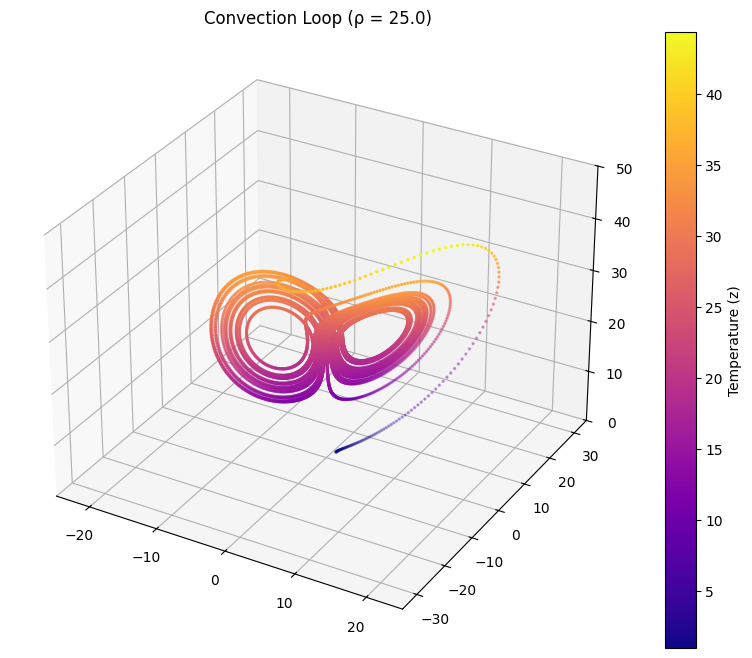

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.integrate import odeint
from ipywidgets import interact, FloatSlider
from IPython.display import HTML

# Параметры системы
sigma = 10.0
beta = 1.0    # b = 1 по условию

def lorenz_system(state, t, rho):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Начальные условия
initial_state = [1.0, 1.0, 1.0]
t = np.linspace(0, 40, 10000)

# Создание фигуры
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim((-25, 25))
ax.set_ylim((-35, 35))
ax.set_zlim((0, 50))
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")

# Инициализация графика
scat = ax.scatter([], [], [], c=[], cmap='plasma', s=2)
rho = 25
ax.clear()
ax.set_xlim((-25, 25))
ax.set_ylim((-35, 35))
ax.set_zlim((0, 50))

# Решение уравнений
solution = odeint(lorenz_system, initial_state, t, args=(rho,))
x, y, z = solution.T

# Визуализация с цветовой кодировкой температуры
scat = ax.scatter(x, y, z, c=z, cmap='plasma', s=2)
fig.colorbar(scat, ax=ax, label='Temperature (z)')
ax.set_title(f'Convection Loop (ρ = {rho:.1f})')
# def update(rho=28.0):
#     ax.clear()
#     ax.set_xlim((-25, 25))
#     ax.set_ylim((-35, 35))
#     ax.set_zlim((0, 50))
    
#     # Решение уравнений
#     solution = odeint(lorenz_system, initial_state, t, args=(rho,))
#     x, y, z = solution.T
    
#     # Визуализация с цветовой кодировкой температуры
#     scat = ax.scatter(x, y, z, c=z, cmap='plasma', s=2)
#     fig.colorbar(scat, ax=ax, label='Temperature (z)')
#     ax.set_title(f'Convection Loop (ρ = {rho:.1f})')
    
#     return scat,

# Создание анимации
# @interact(rho=FloatSlider(value=28.0, min=0.1, max=50.0, step=0.5, description='Heating (ρ):'))
# def animate(rho):
#     return update(rho)

# plt.close()